# Assignment 8: Naive Bayes Spam Classification

### Importing necessory libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import pandas as pd

### Loading Data

In [2]:
file_path = "C:/Users/patel/spam.xlsx"

data = pd.read_excel(file_path)

df = pd.DataFrame(data)

print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


### Handling Missing and unwanted data

In [3]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df.dropna()
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Preparing for Classification(Labels and Features)

In [4]:
df['v2'] = df['v2'].astype(str)
X = df['v2']
y = df['v1']

### Converting Text into numerical features

In [5]:
#convert Text data into Numerical feature using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

### Spliting data into Train and Test Set(80% train data and 20% test data)

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the model

In [7]:
# Initialize Naive Bayes classifier
mnb = MultinomialNB()

# Train the classifier
mnb.fit(X_train, y_train)

MultinomialNB()

### Making Prediction

In [8]:
# Make predictions on the test set
y_pred = mnb.predict(X_test)

### Finding Accuracy

In [9]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.91
Recall: 0.93
F1 Score: 0.92


### Ploating Confusion Matrix

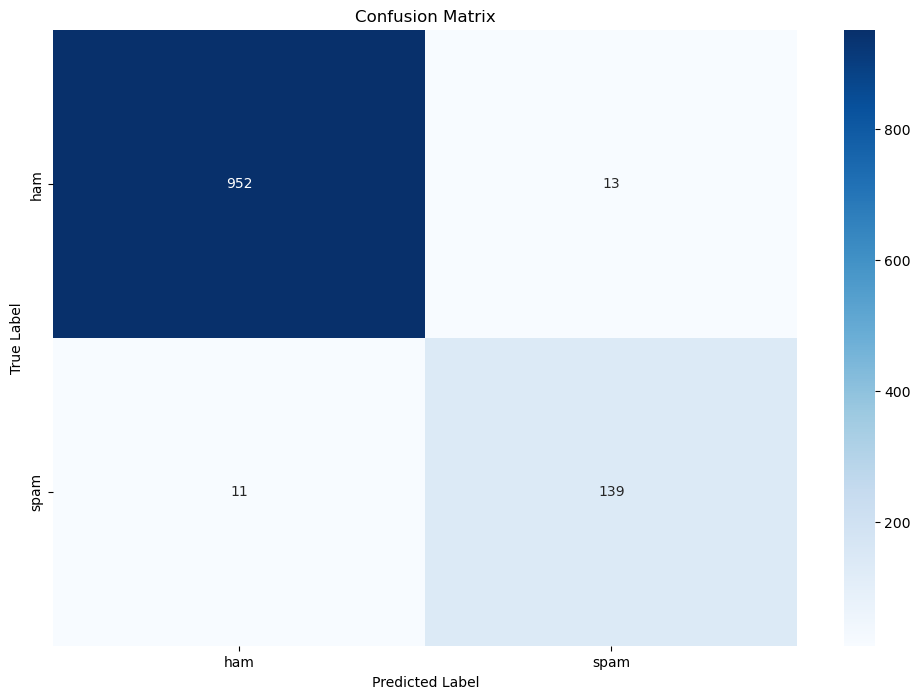

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=mnb.classes_ , yticklabels =mnb.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()